# Import Library dan Datset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Impor Data Ritel Online yang berisi transaksi dari 12/01/2010 dan 12/09/2011
df = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Cleaning Dataset

In [4]:
#Melakukan pengecekan shape (columns and rows) dari dataset
df.shape

(541909, 8)

In [5]:
#Customer distribution by country
country_cust_data=df[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
#Hanya menggunakan data dengan country United Kingdom
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [7]:
#Check missing value pada dataset
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [8]:
#Hapus nilai dari kolom CustomerID
df = df[pd.notnull(df['CustomerID'])]
df.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#Validasi jika ada nilai negatif di kolom Quantity
df.Quantity.min()

-80995

In [10]:
#Filter data yang bernilai negatif di kolom Quantity
df = df[(df['Quantity']>0)]

In [11]:
#Validasi jika ada nilai negatif di kolom UnitPrice
df.UnitPrice.min()

0.0

In [12]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [14]:
#Convert kolom InvoiceDate dari string ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [17]:
#Menambahkan kolom baru total amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [19]:
df.shape

(354345, 9)

# RFM Modelling

- Recency = Latest Date - Last Inovice Data
- Frequency = count of invoice no. of transaction(s)
- Monetary = Sum of Total 

In [20]:
import datetime as dt

In [21]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [22]:
#Menetapkan tgl terbaru 10-12-2011, hal ini untuk menghitung jumlah hari sejak tanggal invoice terakhir
Latest_Date = dt.datetime(2011,12,10)

In [23]:
#Membuat RFM Modelling scores untuk setiap customet
rfm_scores = df.groupby('CustomerID').agg({
    #Recency
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,

    #Frequency
    'InvoiceNo': lambda x: len(x),

    #Monetary
    'TotalAmount': lambda x: x.sum()
})

In [24]:
rfm_scores.head()

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [25]:
#Convert data type dari InvoiceDate menjadi int
rfm_scores['InvoiceDate'] = rfm_scores['InvoiceDate'].astype(int)

In [26]:
#Rename column pada rfm_scores
rfm_scores.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

In [27]:
#Tampilkan dan reset index
rfm_scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [28]:
rfm_scores.shape

(3921, 3)

In [29]:
#Descriptive Statistics (Recency)
rfm_scores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

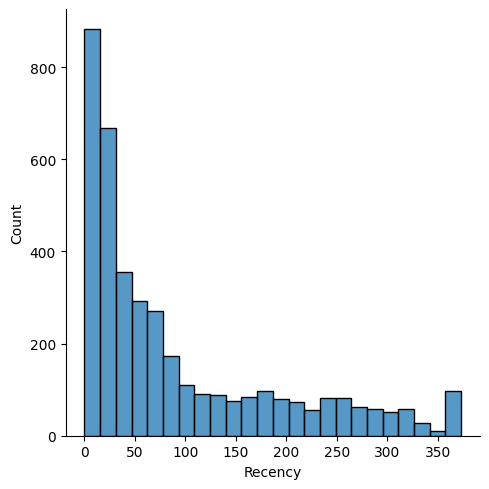

In [30]:
#Recency distribution plot
import seaborn as sns
x = rfm_scores['Recency']

ax = sns.displot(x)

In [31]:
#Descriptive Statistics (Frequency)
rfm_scores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

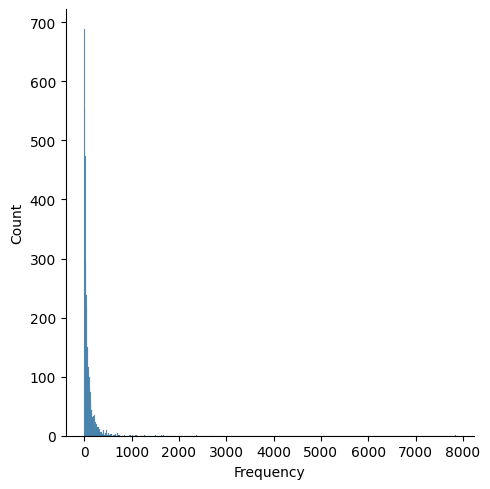

In [32]:
#Plot distribusi Recency
x = rfm_scores['Frequency']

ax = sns.displot(x)

In [33]:
frq = rfm_scores.query('Frequency > 1000')['Frequency']
len(frq)

17

In [34]:
frq

CustomerID
12748.0    4596
13081.0    1028
13089.0    1818
13263.0    1677
14056.0    1106
14096.0    5111
14159.0    1204
14298.0    1637
14606.0    2700
14769.0    1090
14796.0    1141
15005.0    1119
15039.0    1502
15311.0    2379
16033.0    1137
17841.0    7847
18118.0    1279
Name: Frequency, dtype: int64

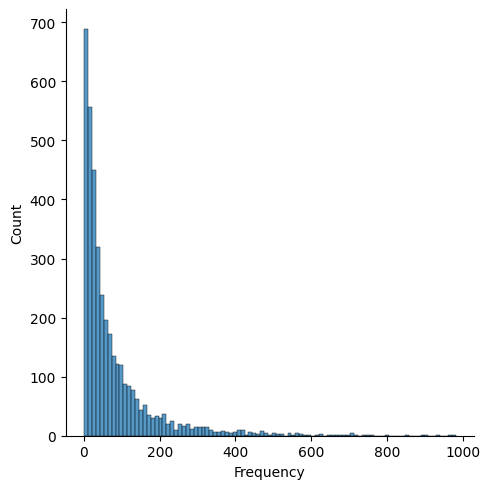

In [35]:
#Plot distribusi frekuensi, mengambil observasi yang frekuensinya kurang dari 1000
x = rfm_scores.query('Frequency < 1000')['Frequency']

ax = sns.displot(x)

In [36]:
#Descriptive Statistics (Monetary)
rfm_scores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

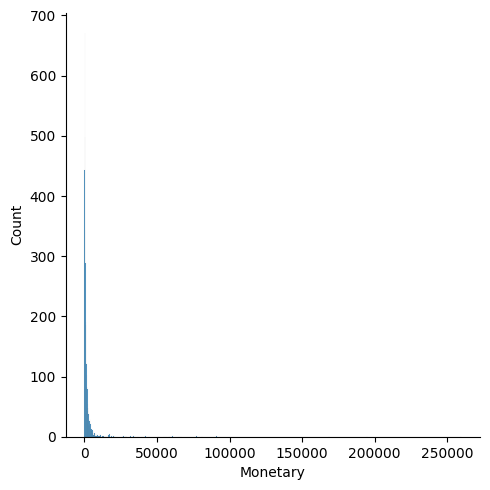

In [37]:
#Plot distribusi Monetary
x = rfm_scores['Monetary']

ax = sns.displot(x)

In [38]:
mon = rfm_scores.query('Monetary > 10000')['Monetary']
len(mon)

85

In [39]:
mon

CustomerID
12346.0     77183.60
12748.0     33719.73
12901.0     17654.54
12921.0     16587.09
12931.0     42055.96
             ...    
17841.0     40991.57
17857.0     26879.04
17865.0     10526.32
17949.0     58510.48
18102.0    259657.30
Name: Monetary, Length: 85, dtype: float64

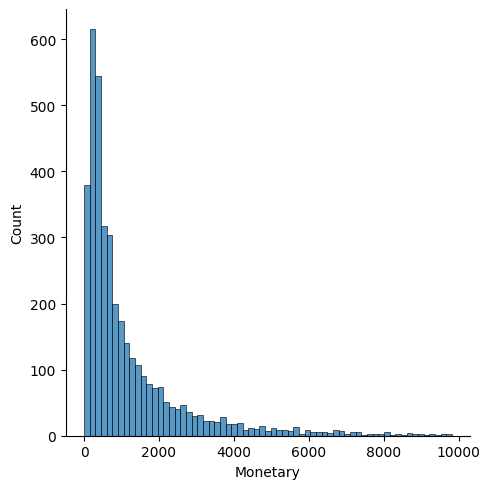

In [40]:
#Monateray distribution plot, nilainya kurang dari 10000
import seaborn as sns
x = rfm_scores.query('Monetary < 10000')['Monetary']

ax = sns.displot(x)

In [41]:
#Split menjadi empat segmen menggunakan kuartil
split = rfm_scores.quantile(q=[0.25,0.5,0.75])
split = split.to_dict()

In [42]:
split

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [43]:
#Fungsi untuk membuat R, F and M segments

#Recency
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#Frequency  
def FScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Monetary 
def MScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [44]:
#Hitung & Tambahkan kolom nilai segmen R, F dan M di kumpulan data yang ada untuk menampilkan nilai segmen R, F dan M
rfm_scores['R'] = rfm_scores['Recency'].apply(RScoring, args=('Recency',split,))
rfm_scores['F'] = rfm_scores['Frequency'].apply(FScoring, args=('Frequency',split,))
rfm_scores['M'] = rfm_scores['Monetary'].apply(MScoring, args=('Monetary',split,))
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [45]:
#Hitung dan tambahkan pada column baru RFMGroup untuk melihat kombinasi dari rfm score
rfm_scores['RFMGroup'] = rfm_scores.R.map(str) + rfm_scores.F.map(str) + rfm_scores.M.map(str)

In [46]:
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [47]:
#Hitung dan tambahkan pada column baru RFMScore untuk menampilkan total sum dari RFMGroup values
rfm_scores['RFMScore'] = rfm_scores[['R', 'F', 'M']].sum(axis=1)
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [48]:
#Menetapkan Loyalty Level untuk masing-masing customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_scores.RFMScore, q = 4, labels = Loyalty_Level)
rfm_scores['RFM_Loyalty_Level'] = Score_cuts.values
rfm_scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [49]:
#Validate the data for RFMGroup = 111
rfm_scores[rfm_scores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


In [53]:
import plotly.offline as po
import plotly.graph_objs as gobj

In [54]:
#Recency Vs Frequency
graph = rfm_scores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [52]:
#Frequency Vs Monetary
graph = rfm_scores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]
plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [55]:
#Recency Vs Monetary
graph = rfm_scores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# K-Means Clustering

In [56]:
#Menangani nilai negatif dan nol untuk menangani infinite numbers selama transformasi logaritma

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [57]:
#Menerapkan fungsi handle_neg_n_zero untuk kolom Recency dan Monetary 

rfm_scores['Recency'] = [handle_neg_n_zero(x) for x in rfm_scores.Recency]
rfm_scores['Monetary'] = [handle_neg_n_zero(x) for x in rfm_scores.Monetary]

In [58]:
#Lakukan transformasi Log untuk membawa data ke distribusi normal atau mendekati normal
Log_Tfd_Data = rfm_scores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

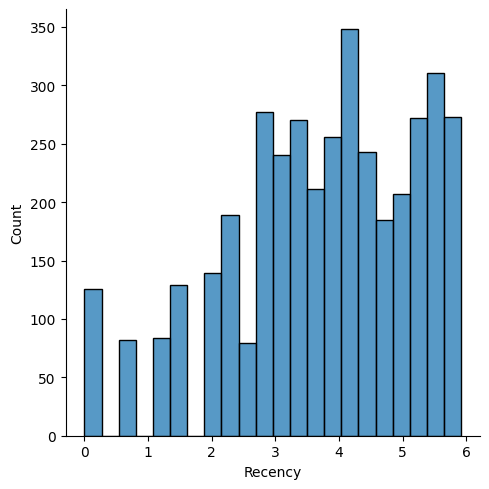

In [59]:
# Data distribution setelah data normalization untuk Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.displot(Recency_Plot)

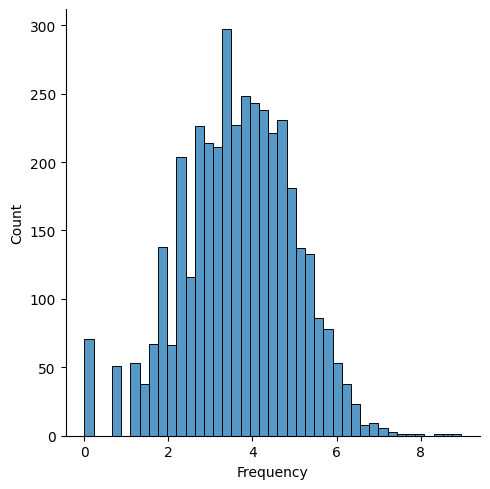

In [60]:
#Data distribution setelah data normalization untuk Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.displot(Frequency_Plot)

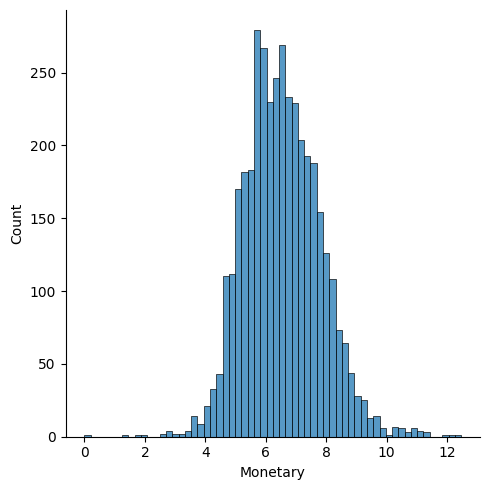

In [61]:
#Data distribution setelah data normalization untuk Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.displot(Monetary_Plot)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Menyeseuaikan data sehingga berada pada skala yang sama
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

In [64]:
# Mengubah Scaled Data kembali menjadi Data Frame
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_scores.index, columns = Log_Tfd_Data.columns)

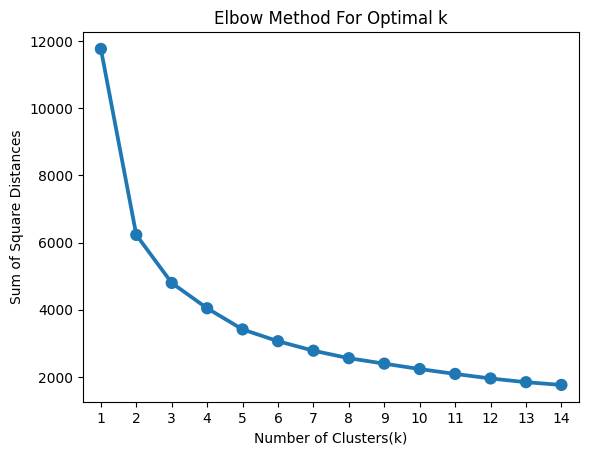

In [66]:
# Menentukan jumlah optimal dari cluster dalam algoritma KMeans dengan menggunakan Elbow Method
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, n_init=10)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
#Lakukan K-Mean Clustering atau buat model clustering K-Means
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000, n_init=10)
KMean_clust.fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=3, n_init=10)

In [68]:
#Temukan cluster untuk observasi yang diberikan dalam dataset
rfm_scores['Cluster'] = KMean_clust.labels_
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,2
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,2
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,2
12820.0,3,59,942.34,1,2,2,122,5,Platinum,2


<Figure size 700x700 with 0 Axes>

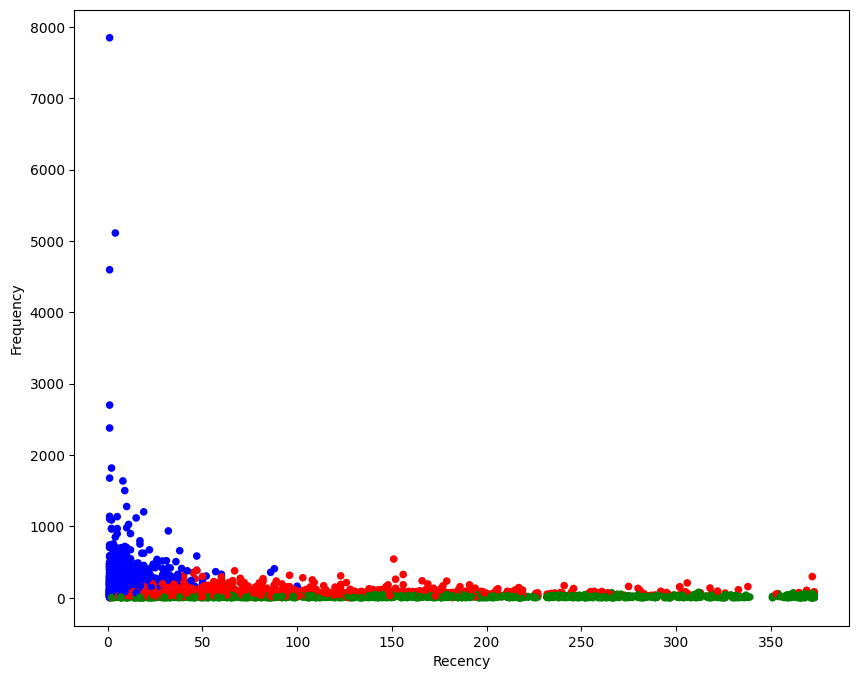

In [69]:
# Visualisasi hubungan antara Recency dan Frequency
from matplotlib import pyplot as plt

# Membuat gambar dengan ukuran 7 x 7
plt.figure(figsize=(7,7))

# Mendefinisikan warna yang akan digunakan untuk mewarnai titik-titik dalam scater plot
Colors = ["red", "green", "blue"]
# Menambahkan kolom Color ke Data Frame
rfm_scores['Color'] = rfm_scores['Cluster'].map(lambda p: Colors[p])
ax = rfm_scores.plot(    
    kind="scatter", 
    # Recency pada sumbu x dan frequency pada sumbu y
    x="Recency", y="Frequency",
    # Menentukan ukuran scatter plot
    figsize=(10,8),
    c = rfm_scores['Color']
)

In [70]:
rfm_scores.head(20)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0,red
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,2,blue
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,2,blue
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,2,blue
12820.0,3,59,942.34,1,2,2,122,5,Platinum,2,blue
12821.0,214,6,92.72,4,4,4,444,12,Bronze,1,green
12822.0,70,46,948.88,3,2,2,322,7,Gold,0,red
12823.0,74,5,1759.50,3,4,1,341,8,Gold,1,green
12824.0,59,25,397.12,3,3,3,333,9,Silver,0,red


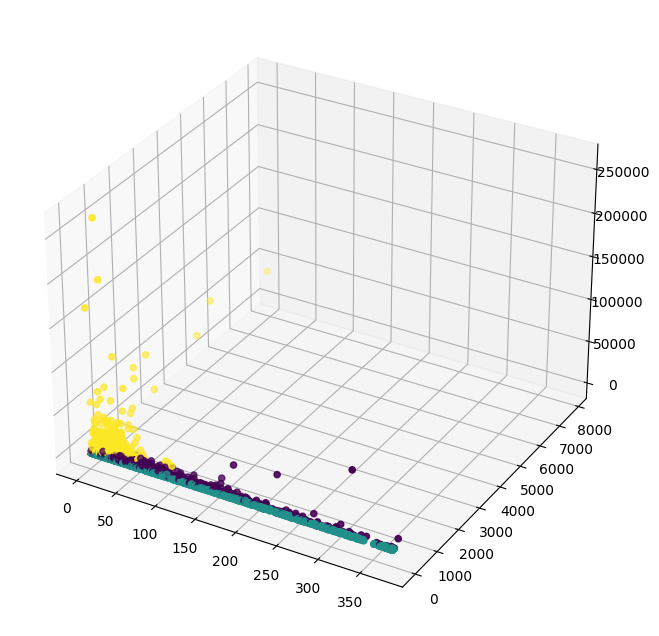

In [71]:
# Membuat plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot 3D
scatter = ax.scatter3D(rfm_scores['Recency'], rfm_scores['Frequency'], rfm_scores['Monetary'], c=rfm_scores['Cluster'])

# Menampilkan plot
plt.show()